In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from pltconfig import *

In [2]:
# This is the raw data from the Spark plate reader. Will smooth it for plotting. 
growth_df = pd.read_csv('data/sup_figs/101618_CAfree_pCCM_complementation.csv', index_col=0)

growth_df.head()

,time_s,BW:vec,CAfree:vec,CAfree:pFA-DAB1,CAfree:pFA-DAB2,CAfree:pCCM,BLANK,BW:vec induced,CAfree:vec induced,CAfree:pFA-DAB1 induced,...,CAfree:pFA-DAB1.7,CAfree:pFA-DAB2.7,CAfree:pCCM.7,BLANK.14,BW:vec induced.7,CAfree:vec induced.7,CAfree:pFA-DAB1 induced.7,CAfree:pFA-DAB2 induced.7,CAfree:pCCM induced .7,BLANK.15
cycle_n,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.1187,0.1382,0.1302,0.1268,0.1312,0.1227,0.1223,0.1270,0.1209,...,0.1254,0.1238,0.1226,0.1160,0.1141,0.1162,0.1126,0.1109,0.1083,0.0972
2,312.3,0.1373,0.1347,0.1310,0.1295,0.1333,0.1234,0.1273,0.1284,0.1221,...,0.1245,0.1255,0.1256,0.1195,0.1149,0.1164,0.1134,0.1131,0.1114,0.0983
3,624.6,0.1367,0.1283,0.1306,0.1292,0.1357,0.1226,0.1253,0.1310,0.1267,...,0.1197,0.1255,0.1235,0.1164,0.1138,0.1205,0.1155,0.1118,0.1148,0.0974
4,936.9,0.1378,0.1291,0.1303,0.1341,0.1349,0.1234,0.1264,0.1302,0.1242,...,0.1207,0.1226,0.1225,0.1193,0.1165,0.1183,0.1141,0.1139,0.1154,0.0938
5,1249.2,0.1397,0.1338,0.1320,0.1332,0.1313,0.1263,0.1256,0.1314,0.1224,...,0.1203,0.1230,0.1171,0.1170,0.1148,0.1184,0.1142,0.1150,0.1177,0.0934


In [3]:
od_cols = growth_df.columns[1:]

# Use blank wells to blank the measurements. 
blank_cols = [c for c in growth_df.columns if c.startswith('BLANK')]
mean_blank = growth_df[blank_cols].mean().mean()
growth_df[od_cols] -= mean_blank

# Smoothing is windowed mean twice over a 3 measurement window 
smoothed_df = growth_df.copy()
smoothed_df[od_cols] = smoothed_df[od_cols].rolling(3, min_periods=1).apply(np.nanmean)
smoothed_df[od_cols] = smoothed_df[od_cols].rolling(3, min_periods=1).apply(np.nanmean)

In [4]:
# Only plotting induced data for the figure.
cols2use = [c for c in od_cols if 'induced' in c]

positive_contols = [c for c in cols2use if c.startswith('BW')]
negative_controls = [c for c in cols2use if c.startswith('CAfree:vec')]
# This is the full DAB2 operon, which is just DabA2 and DabB2
dab2_comp = [c for c in cols2use if c.startswith('CAfree:pFA-DAB2')]
# This is pFA expression the DAB1 genes. 
dab1_comp = [c for c in cols2use if c.startswith('CAfree:pFA-DAB1')]
# This is the full operon of 11 genes that contains within it the DAB1 genes. 
exp = [c for c in cols2use if c.startswith('CAfree:pCCM')]

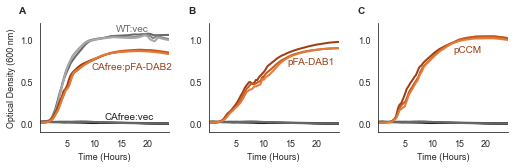

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(7.25, 2.5))
sns.set_style('white')

ax = axs[0]
plt.sca(ax)

time_h = smoothed_df.time_s / (60*60)
for i, name in enumerate(positive_contols):
    if i >= 3: break
    c = greys[-i-3]
    ax.plot(time_h, smoothed_df[name], color=c, lw=2)

for i, name in enumerate(negative_controls):
    if i >= 3: break
    c = greys[-i-1]
    ax.plot(time_h, smoothed_df[name], color=c, lw=2)

for i, name in enumerate(dab2_comp):
    if i >= 3: break
    c = oranges[-i-1]
    ax.plot(time_h, smoothed_df[name], color=c, lw=2)

plt.text(14, 1.1, 'WT:vec', color=greys[-3])
plt.text(9.5, 0.65, 'CAfree:pFA-DAB2', color=oranges[-1])
plt.text(12, 0.05, 'CAfree:vec', color=greys[-1])
plt.xticks(np.arange(5, 25, 5), fontsize=9)
plt.yticks(np.arange(0, 1.55, 0.5), fontsize=9)
plt.xlim(0, 24)
plt.ylim(-0.1, 1.2)
plt.xlabel('Time (Hours)', fontsize=9)
plt.ylabel('Optical Density (600 nm)', fontsize=9)
sns.despine()

ax = axs[1]
plt.sca(ax)
    
for i, name in enumerate(negative_controls):
    if i >= 3: break
    c = greys[-i-1]
    ax.plot(time_h, smoothed_df[name], color=c, lw=2)

for i, name in enumerate(dab1_comp):
    if i >= 3: break
    c = oranges[-i-1]
    ax.plot(time_h, smoothed_df[name], color=c, lw=2)


plt.text(14.5, 0.7, 'pFA-DAB1', color=oranges[-1])
plt.xticks(np.arange(5, 25, 5), fontsize=9)
plt.yticks(np.arange(0, 1.55, 0.5), fontsize=9)
plt.xlim(0, 24)
plt.ylim(-0.1, 1.2)
plt.xlabel('Time (Hours)', fontsize=9)
sns.despine()

ax = axs[2]
plt.sca(ax)
    
for i, name in enumerate(negative_controls):
    if i >= 3: break
    c = greys[-i-1]
    ax.plot(time_h, smoothed_df[name], color=c, lw=2)
    
for i, name in enumerate(exp):
    if i >= 3: break
    c = oranges[-i-1]
    ax.plot(time_h, smoothed_df[name], color=c, lw=2)

plt.text(14, 0.85, 'pCCM', color=oranges[-1])
plt.xticks(np.arange(5, 25, 5), fontsize=9)
plt.yticks(np.arange(0, 1.55, 0.5), fontsize=9)
plt.xlim(0, 24)
plt.ylim(-0.1, 1.2)
plt.xlabel('Time (Hours)', fontsize=9)
sns.despine()

for l, ax in zip('ABC', axs):
    ax.text(-0.1, 1.15, l, transform=ax.transAxes,
          fontsize=10, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.savefig('fig1/fig1S2.png', dpi=600)
plt.show()

In [6]:
print('Positive controls:', len(positive_contols))
print('Negative controls:', len(negative_controls))
print('Induced comparisons (pFA-DAB2):', len(dab2_comp))
print('Induced comparisons (pFA-DAB1):', len(dab1_comp))
print('Induced experiments:', len(exp))

Positive controls: 8
Negative controls: 8
Induced comparisons (pFA-DAB2): 8
Induced comparisons (pFA-DAB1): 8
Induced experiments: 8
